# EM for Document Clustering

Environment: R 3.6.1 and Jupyter notebook

Libraries used:
* dplyr
* tm

## Introduction

In this notebook, the algorithms of EM will be derived and implemented for document clustering.

## Hard EM algorithm

To introduce the EM algorithm for documents clustering, this section is started with introducing the annotations.

For each document $d_n$, $n \in N$ documents, there are $w$ words, and the counts of each word is recorded as $c(w, d_n)$. A collection containing all words in all documents is $A$. The purpose of documents clustering is to group the documents with $K$ clusters, and the latent variable for this document is recorded as $z_{n}$, which is a vector $(z_{n1}, z_{n2}, \cdots, z_{nk})$ .

The cluster proportion is $\varphi_k$ for k-th cluster, and the word proportion is written as $\mu_k$ . The parameters $\theta$ can be considered as the collection $(\varphi, \mu_1, \mu_2, \cdots, \mu_K)$.

These proportions obey the rules,
$$\begin{equation}
\begin{split}
\sum_{k=1}^{K}\varphi_k=1 \\
\sum_{w\in A}\mu_{k,w}=1
\end{split}
\end{equation}
$$

The purpose of EM algorithm is to maximize the log-likelihood of $\theta$. Therefore, the log-likelihood of $\theta$ is,
$$
ln p(d_1, \cdots, d_N)=\sum_{n=1}^{N}lnp(d_n)=\sum_{n=1}^{N}ln\sum_{k=1}^{K}(\varphi_k\prod_{w\in A}\mu_{k,w}^{c(w,d_n)})
$$

The responsibility factor, which represents the probability of being each cluster for n-th document.
$$\gamma(z_{n,k}) = p(z_{n,k} = 1 | d_n, \theta^{old})$$

As this is the probability,
$$\sum_{k=1}^{K}\gamma(z_{n,k}) = 1$$

In soft EM, the value of $\gamma$ can be multiple probabilities for each cluster, but in <b>hard EM</b>, the value in $\gamma(z_n)$ is $1$ for the cluster with highest likelihood, and $0$ for others. Both soft EM and hard EM follow the constrains of the sum of $\gamma(z_n)$ for all clusters equals to $1$ .

The Q function is introduced as the core of EM algorithm, which will be maximized. From these 2 equations above,
$$\begin{equation}
\begin{split}
Q(\theta, \theta^{old}) &= \sum_{n=1}^{N}\sum_{k=1}^{K}p(z_{n,k}=1|d_n, \theta^{old})lnp(z_{n,k}=1, d_n | \theta) \\
&=\sum_{n=1}^{N}\sum_{k=1}^{K}\gamma(z_{n,k})(ln\varphi_k+\sum_{w\in A}c(w, d_n)ln\mu_{k,w})
\end{split}
\end{equation}
$$

To maximize the $Q(\theta, \theta^{old})$ for $\theta$, the Lagrangian will be applied, because there are 2 constrain applied to $\varphi_k$ and $\mu_{k,w}$

$$\begin{equation}
\begin{split}
L(\theta, \lambda_1, \lambda_2) = Q(\theta, \theta^{old}) - \lambda_1(\sum_{k=1}^{K}\varphi_k-1) - \lambda_2(\sum_{w\in A}\mu_{k,w}-1)
\end{split}
\end{equation}
$$

For better representation, the amount of documents of k-th cluster is denoted as 
$$
N_k = \sum_{n=1}^N\gamma(z_{n,k})
$$

As the $\theta$ is the collection of parameters $\varphi_k$ and $\mu_{k,w}$, therefore, applying derivatives to $\theta$ is applying derivatives to $\varphi_k$ and $\mu_{k,w}$. The first step is to derive the value of $\varphi_k$ .

$$\begin{equation}
\begin{split}
\frac{\partial L}{\partial \varphi_k} &= \frac{\partial Q}{\partial \varphi_k} - \lambda_1 \\
&= \sum_{n=1}^{N}\gamma(z_{n,k})\cdot \frac{1}{\varphi_k} - \lambda_1 \\
&= \frac{N_k}{\varphi_k} - \lambda_1 = 0 
\end{split}
\end{equation}
$$ 

Therefore, 
$$\begin{equation}
\begin{split}
\varphi_k &= \frac{N_k}{\lambda_1} \\
\frac{\partial L}{\partial \lambda_1} &= \sum_{k=1}^{K}\varphi_k-1 \\
&= \frac{\sum_{k=1}^{K}N_k}{\lambda_1}-1 \\
&= \frac{N}{\lambda_1} - 1 = 0 \\
\lambda_1 &= N
\end{split}
\end{equation} 
$$

After the $\lambda_1$ is examined, the $\varphi_k$ is known.
$$
\varphi_k = \frac{N_k}{N}
$$

Next step is to derive the value of $\mu_{k,w}$

$$\begin{equation}
\begin{split}
\frac{\partial L}{\partial \mu_{k,w}}=\sum_{n=1}^{N}\gamma(z_{n,k})\cdot\frac{c(w, d_n)}{\mu_{k,w}} - \lambda_2 = 0
\end{split}
\end{equation}
$$

Move the $\mu_{k,w}$ to the left hand side.

$$
\mu_{k,w}=\frac{\sum_{n=1}^N\gamma(z_{n,k})\cdot c(w, d_n)}{\lambda_2}
$$

Apply summation of $w$ to both side,

$$\begin{equation}
\begin{split}
\sum_{w\in A} \mu_{k,w} = \frac{\sum_{w\in A}\sum_{n=1}^N\gamma(z_{n,k})\cdot c(w, d_n)}{\lambda_2} = 1
\end{split}
\end{equation} 
$$

Therefore, derive the $\lambda_2$ .

$$
\lambda_2 = \sum_{w\in A}\sum_{n=1}^N\gamma(z_{n,k})\cdot c(w, d_n)
$$

Hence, the value of $\mu_{k,w}$ is known. To avoid confusion, the variable $w$ applied by summation is written as $w'$ .

$$
\mu_{k,w}=\frac{\sum_{n=1}^N\gamma(z_{n,k})\cdot c(w, d_n)}{\sum_{w'\in A}\sum_{n=1}^N\gamma(z_{n,k})\cdot c(w', d_n)}
$$

In conclusion, to maximize the $Q(\theta, \theta^{old})$, the value of $\theta$ is,

$$\begin{equation}
\begin{split}
\varphi_k &= \frac{N_k}{N}= \frac{\sum_{n=1}^N\gamma(z_{n,k})}{N} \\
\mu_{k,w} &= \frac{\sum_{n=1}^N\gamma(z_{n,k})\cdot c(w, d_n)}{\sum_{w'\in A}\sum_{n=1}^N\gamma(z_{n,k})\cdot c(w', d_n)}
\end{split}
\end{equation} 
$$

After the value of $\theta$ for maximizing $Q(\theta, \theta^{old})$ is derived, the next step is to introduce the hard EM process.

As the EM algorithm is an iterative algorithm, the initial value of $\theta^{old}$ will be assigned as some method, such as random value.

While the value of $\theta$ is not converged:
* E step: calculate the $\gamma(z_{n,k})$ for all documents and clusters
  $$
  \gamma(z_{n,k}) = \varphi_k \prod_{w\in A}\mu_{k,w}^{c(w,d)}
  $$
  In log scale:
  $$
  ln(\gamma(z_{n,k})) = ln(\varphi_k) + \sum_{w\in A}c(w,d)\cdot ln(\mu_{k,w})
  $$
* if <b>Hard EM</b>:
    * set the largest value in $\gamma(z_n)$ as $1$
    * set other values in $\gamma(z_n)$ as $0$
* M step: set the $\varphi_k$ and $\mu_{k,w}$ by the formula mentioned above.
    $$\begin{equation}
    \begin{split}
    \varphi_k &= \frac{\sum_{n=1}^N\gamma(z_{n,k})}{N} \\
    \mu_{k,w} &= \frac{\sum_{n=1}^N\gamma(z_{n,k})\cdot c(w, d_n)}{\sum_{w'\in A}\sum_{n=1}^N\gamma(z_{n,k})\cdot c(w', d_n)}
    \end{split}
    \end{equation} 
    $$
* $\theta^{old} \leftarrow \theta$

If the difference of \theta and \theta^{old} is less than the tolerance specified, the loop will be terminated.

## Import libraries

In [1]:
library(dplyr)
library(tm)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"

In [3]:
eps=1e-10
  
# reading the data
read.data <- function(file.name, sample.size=1000, seed=100, pre.proc=TRUE, spr.ratio= 0.90) {
  
  # Read the data
  text <- readLines(file.name)
  # select a subset of data if sample.size > 0
  if (sample.size>0){
    set.seed(seed)
    text <- text[sample(length(text), sample.size)]
  }
  ## the terms before the first '\t' are the lables (the newsgroup names) and all the remaining text after '\t' are the actual documents
  docs <- strsplit(text, '\t')
  # store the labels for evaluation
  labels <- unlist(lapply(docs, function(x) x[1]))
  # store the unlabeled texts    
  # docs <- data.frame(unlist(lapply(docs, function(x) x[2])))
  uid <- paste0("doc_", formatC(1:length(text), width = 4, format = "d", flag = "0"))
  docs <- data.frame(doc_id = uid, text = unlist(lapply(docs, function(x) x[2])))
  

  # create a corpus
  docs <- DataframeSource(docs)
  corp <- Corpus(docs)
  
  # Preprocessing:
  if (pre.proc){
    corp <- tm_map(corp, removeWords, stopwords("english")) # remove stop words (the most common word in a language that can be find in any document)
    corp <- tm_map(corp, removePunctuation) # remove pnctuation
    corp <- tm_map(corp, stemDocument) # perform stemming (reducing inflected and derived words to their root form)
    corp <- tm_map(corp, removeNumbers) # remove all numbers
    corp <- tm_map(corp, stripWhitespace) # remove redundant spaces 
  }  
  # Create a matrix which its rows are the documents and colomns are the words. 
  dtm <- DocumentTermMatrix(corp)
  ## reduce the sparcity of out dtm
  dtm <- removeSparseTerms(dtm, spr.ratio)
  ## convert dtm to a matrix
  word.doc.mat <- as.matrix(dtm)
  
  # Return the result
  return (list("docs" = docs, "word.doc.mat"= word.doc.mat, "labels" = labels))
}

logSum <- function(v) {
   m = max(v)
   return (m + log(sum(exp(v-m))))
}

initial.param <- function(vocab_size, K=4, seed=123456){
  rho <- matrix(1/K,nrow = K, ncol=1)                    # assume all clusters have the same size (we will update this later on)
  mu <- matrix(runif(K*vocab_size),nrow = K, ncol = vocab_size)    # initiate Mu 
  mu <- prop.table(mu, margin = 2)               # normalization to ensure that sum of each row is 1
  return (list("rho" = rho, "mu"= mu))
}
                                                        
train_obj <- function(model, counts) { 
  N <- dim(counts)[1] # number of documents
  K <- dim(model$mu)[1]
   
  nloglike = 0
  for (n in 1:N){
    lprob <- matrix(0,ncol = 1, nrow=K)
    for (k in 1:K){
      lprob[k,1] = sum(counts[n,] * log(model$mu[k,] + eps)) 
    }
    nloglike <- nloglike - logSum(lprob + log(model$rho))
  }
  
  return (nloglike)
}

cluster.viz <- function(doc.word.mat, color.vector, title=' '){
  p.comp <- prcomp(doc.word.mat, scale. = TRUE, center = TRUE)
  plot(p.comp$x, col=color.vector, pch=1,  main=title)
}

## E step Implementation

The function `E.step` add a new argument `mode` to perform the hard E step and soft E step in one function.

In [4]:
E.step <- function(gamma, model, counts, mode = "soft"){
  # Model Parameter Setting
  N <- dim(counts)[1] # number of documents
  K <- dim(model$mu)[1] 

  # E step:    
  for (n in 1:N){
    for (k in 1:K){
      ## calculate the posterior based on the estimated mu and rho in the "log space"
      gamma[n,k] <- log(model$rho[k,1] + eps) + sum(counts[n,] * log(model$mu[k,] + eps))
    }
    # normalisation to sum to 1 in the log space
    logZ = logSum(gamma[n,])
    gamma[n,] = gamma[n,] - logZ
  }
  # converting back from the log space 
  gamma <- exp(gamma)
    
  # implement the hard E step  
  if (mode == "hard") {
    max_ind <- gamma == apply(gamma, 1, max)
    gamma[max_ind] <- 1 - (K - 1) * eps
    gamma[!max_ind] <- eps  
  }  
  return (gamma)
}

## M step implementation

In [5]:
M.step <- function(gamma, model, counts){
  # Model Parameter Setting
  N <- dim(counts)[1]   # number of documents
  W <- dim(counts)[2]   # number of words i.e. vocabulary size
  K <- dim(model$mu)[1] # number of clusters
    
  # M step: Student needs to write this part for soft/hard EM

  # calculate rho(Aka. phi)(N_k for all clusters)
  model$rho <- matrix(colSums(gamma), ncol=1) / N
  for (k in 1:K) {
    # calculate mu
    model$mu[k,] <- ((gamma[,k] * counts) %>% colSums) / ((gamma[,k] * counts) %>% sum)
  }
    
  # Return the result
  return (model)
}

## EM algorithm implementation

The main modification from the original material is that the E step is using `mode` argument to perform hard E step and soft E step.

In [6]:
EM <- function(counts, K=4, max.epoch=10, seed=123456, mode = "soft"){

  # Model Parameter Setting
  N <- dim(counts)[1] # number of documents
  W <- dim(counts)[2] # number of unique words (in all documents)
  
  # Initialization
  model <- initial.param(W, K=K, seed=seed)
  gamma <- matrix(0, nrow = N, ncol = K)

  print(train_obj(model,counts))
  # Build the model
  for(epoch in 1:max.epoch){
    # E Step
    gamma <- E.step(gamma, model, counts, mode)  
    # M Step
    model <- M.step(gamma, model, counts)
    print(train_obj(model,counts)) 
  }
    
  # Return Model
  return(list("model"=model,"gamma"=gamma))
}

## Main function

According to the requirement, the K value is $4$ .

Modify the `EM.main` to add an argument `real.label.visualize` to control the visualization process.

In [7]:
EM.main = function(mode, K, epochs=5, seed = 5201, real.label.visualize = FALSE) {
    set.seed(seed)
    
    data <- read.data(file.name='train6.txt', sample.size=0, seed=seed, pre.proc=TRUE, spr.ratio= .99)

    # word-document frequency matrix 
    counts <- data$word.doc.mat

    # calling the EM algorithm on the data
    res <- EM(counts, K=K, max.epoch=epochs, mode = mode, seed = seed)
    
    # visualization
    ## find the culster with the maximum probability (since we have soft assignment here)
    label.hat <- apply(res$gamma, 1, which.max)
    ## normalize the count matrix for better visualization
    counts <- counts %>% t %>% scale %>% t # only use when the dimensionality of the data (number of words) is large enough
    
    ## visualize the stimated clusters
    cluster.viz(counts, label.hat, paste0('Estimated Clusters (', mode,' EM)'))

    ## visualize the real clusters
    if (real.label.visualize) cluster.viz(counts, factor(data$label), 'Real Clusters')
}

## Visualization

[1] 430983.9
[1] 1948480
[1] 1933313
[1] 1925381
[1] 1921843
[1] 1918852
[1] 1916933
[1] 1915952
[1] 1915249
[1] 1914792
[1] 1914677
[1] 429806.9
[1] 1955025
[1] 1942037
[1] 1933460
[1] 1928954
[1] 1926930
[1] 1925272
[1] 1924141
[1] 1922840
[1] 1921903
[1] 1920998


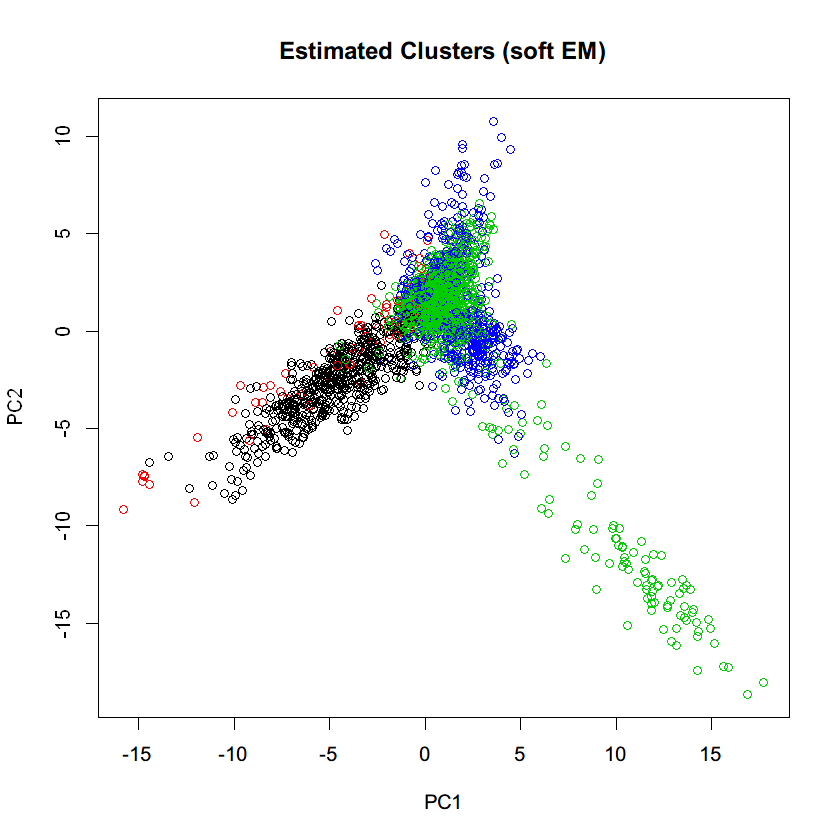

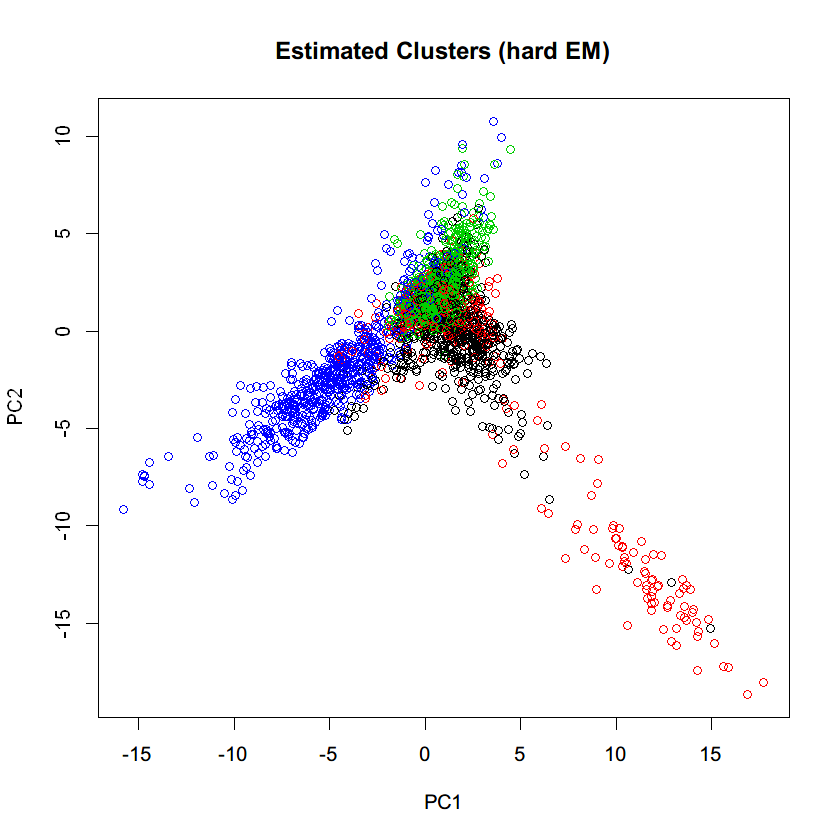

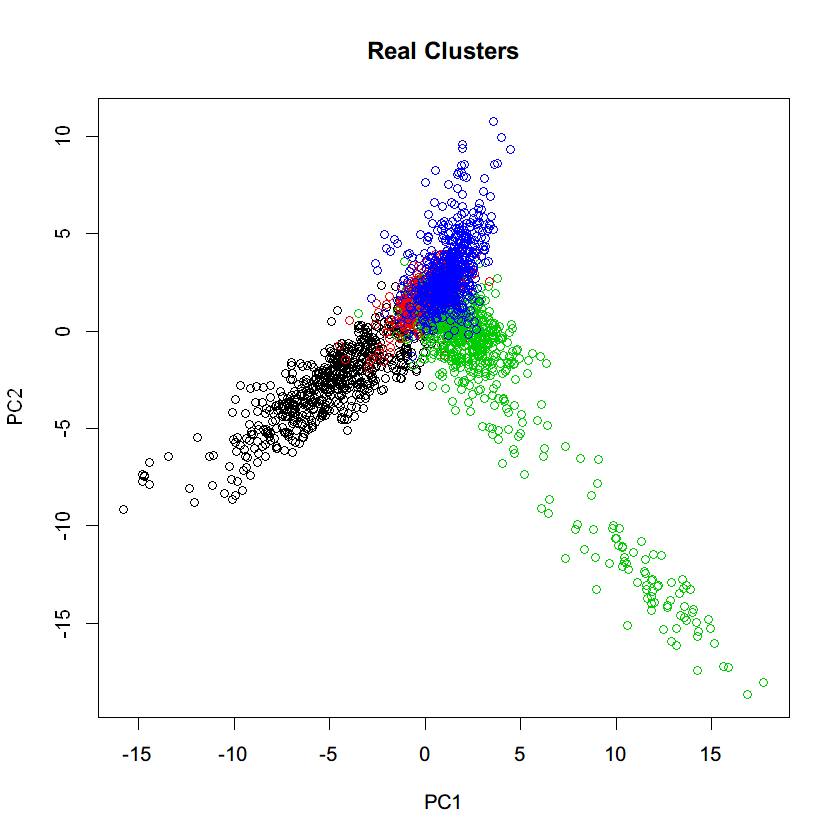

In [8]:
EM.main("soft", 4, epochs=10, seed = NULL, real.label.visualize = FALSE)
EM.main("hard", 4, epochs=10, seed = NULL, real.label.visualize = TRUE)

From the output, the results of soft EM and hard EM with same seed has some differences.

In soft EM, the clusters are more divided to each other than hard EM, which means the margin between each cluster are clear. However, in hard EM, the margin is not clear. For example, the green cluster and black cluster are totally mixed.

The reason of different results is that the processing of E step is different in soft EM and hard EM. In soft EM, the posterior $\gamma(z_{n,k})$ for a document can be several scores between 0 and 1 to multiple clusters. However, in hard EM, the largest probability belonging to a cluster in $\gamma(z_{n,k})$ for a document will be assigned hardly as 1, and others as 0. Therefore, in training process, the parameters of hard EM are less stable and the clustering results are not stable as well. So, the results of clustering of hard EM has mixed clusters and unclear margins.